## 1. Reading files and Data analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split

In [2]:
ratings = pd.read_table('ml-100K/u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
print ratings.shape
ratings.head()

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# We can calculate the fill rate of rating matrix
fill_rate = (1.0 * ratings.shape[0] / len(ratings.user_id.drop_duplicates()) / len(ratings.movie_id.drop_duplicates())) * 100
fill_rate

6.304669364224533

That means, not even 6.3% of all entries in the rating matrix are filled.

In [4]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_table('ml-100K/u.item', sep='|', header=None, 
                       names=['movie_id', 'title', 'released', 'video_release_date', 'IMDb_URL', 'unknown'] + genres)

# Add new column with full list of genres for the movie
movies['genres'] = 0
for i in range(movies.index.size):
    x = []
    for j in genres:
        if movies.loc[i, j] != 0:
            x.append(j)
    movies.loc[i, 'genres'] = '|'.join(x)
    
# Remove all single genre columns and  remain only "genres" column
movies.drop(genres + ['video_release_date', 'IMDb_URL', 'unknown'], inplace=True, axis=1)

print movies.shape
movies.head()

(1682, 4)


,movie_id,title,released,genres
0,1,Toy Story (1995),01-Jan-1995,Animation|Children|Comedy
1,2,GoldenEye (1995),01-Jan-1995,Action|Adventure|Thriller
2,3,Four Rooms (1995),01-Jan-1995,Thriller
3,4,Get Shorty (1995),01-Jan-1995,Action|Comedy|Drama
4,5,Copycat (1995),01-Jan-1995,Crime|Drama|Thriller


In [5]:
users = pd.read_table('ml-100K/u.user', sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
print users.shape
users.head()

(943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# Join all DataFrames
movielens = pd.merge(pd.merge(ratings, movies), users)
print movielens.shape
movielens.head()

(100000, 11)


,user_id,movie_id,rating,timestamp,title,released,genres,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,Comedy,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,Action|Adventure|Comedy|Sci-Fi,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,Comedy|Romance,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,Comedy,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,Comedy|Drama,49,M,writer,55105


# STOP

In [7]:
movielens[['rating', 'age']].describe()

,rating,age
count,100000.000000,100000.000000
mean,3.529860,32.969850
std,1.125674,11.562623
min,1.000000,7.000000
25%,3.000000,24.000000
50%,4.000000,30.000000
75%,4.000000,40.000000
max,5.000000,73.000000


What we see:

- people, who watches movies, are less then 73 years old;

- most common age is less then 40;

- average age is about 33 years;

- average rating is more than 3.5 stars.

In [8]:
# Lets see which movie has how many ratings
movielens['title'].value_counts()

Star Wars (1977)                                   583
Contact (1997)                                     509
Fargo (1996)                                       508
Return of the Jedi (1983)                          507
Liar Liar (1997)                                   485
English Patient, The (1996)                        481
Scream (1996)                                      478
Toy Story (1995)                                   452
Air Force One (1997)                               431
Independence Day (ID4) (1996)                      429
Raiders of the Lost Ark (1981)                     420
Godfather, The (1972)                              413
Pulp Fiction (1994)                                394
Twelve Monkeys (1995)                              392
Silence of the Lambs, The (1991)                   390
Jerry Maguire (1996)                               384
Chasing Amy (1997)                                 379
Rock, The (1996)                                   378
Empire Str

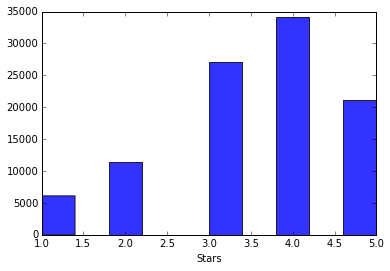

In [9]:
# Display the most common ratings
plt.hist(movielens.rating, bins=10, color='blue', alpha=0.8)
plt.xlabel("Stars")
plt.show()

What we see:

* people like a big part of movies and evaluate them from 3 to 5 stars.

In [10]:
# We are using DataFrame's pivot_table method that allow group data by column very easy. 
mean_ratings = movielens.pivot_table('rating', 'genres', 'gender', aggfunc='mean')

# We want to find the genres of movies by gender. 
# We can add a column to mean_ratings containing the difference in means, then sort by that.
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
sorted_by_diff = mean_ratings.sort('diff')
sorted_by_diff.head(10)

gender,F,M,diff
genres,,,
Mystery|Sci-Fi,1.000000,3.800000,-2.800000
War,1.714286,3.470588,-1.756303
Comedy|Crime|Drama,2.000000,3.666667,-1.666667
Action|Crime|Romance,2.882353,3.700000,-0.817647
Action|Western,3.187500,3.950413,-0.762913
Action|Adventure|Crime|Thriller,2.000000,2.736842,-0.736842
Film-Noir|Sci-Fi|Thriller,3.000000,3.727273,-0.727273
Mystery|Romance|Thriller,2.857143,3.580645,-0.723502
Drama|Western,2.666667,3.333333,-0.666667


What we see:
* top 10 genres of movies that men find better.

In [11]:
# Let's find which movies do men and women most disagree on

# We have DataFrame with multi-level index,  
# therefore we must return new DataFrame with labeling information in the columns under the index names
movielens.reset_index('movie_id', inplace=True)

# We want to find the movies that are most divisive between male and female.
data1 = movielens.pivot_table(index=['movie_id', 'title'], columns='gender', values='rating', fill_value=0)
# 'diff' gives us the movies with rating difference and which were preferred by women
data1['diff'] = data1.M - data1.F
data1.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


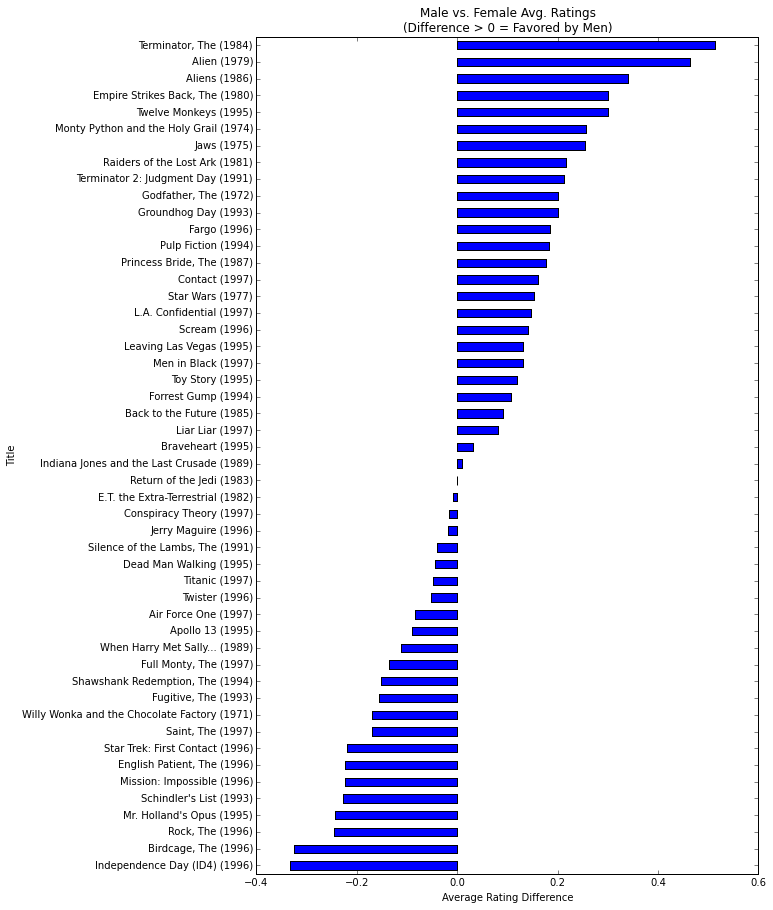

In [12]:
# Let's choose top 50 movies 
most_50 = movielens.groupby('movie_id').size().order(ascending=False)[:50]
data1.reset_index('movie_id', inplace=True)

disagreements = data1[data1.movie_id.isin(most_50.index)]['diff']
disagreements.order().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [13]:
# Find which occupation watches which Genre the most

# Values of occupation we found here: https://github.com/pydata/pydata-book/tree/master/ch02/movielens
occupation = ["Genres", "other", "academic/educator", "artist", "clerical/admin", "college/grad student", 
              "customer service", "doctor/health care", "executive/managerial", "farmer", "homemaker",
              "K-12 student", "lawyer", "programmer", "retired", "sales/marketing", "scientist", "self-employed",
              "technician/engineer", "tradesman/craftsman", "unemployed", "writer"]

# Get data with occupation values group by Genres
genres_by_occupation = movielens.pivot_table('rating', index='genres', columns='occupation', aggfunc='count')

# The next function allow rename values of genres by first category.
def group_genres(df):
    for i,item in enumerate(df.index):
        word = item.partition('|')
        df['Genres1'] = word[0]
    for i,item in enumerate(df.index):
        word = item.partition('|')
        df['Genres1'][i] = word[0]
        
# Call a function
group_genres(genres_by_occupation)

# Group by genres
genres_by_occupation = genres_by_occupation.groupby("Genres1", as_index=False)
genres_by_occupation = genres_by_occupation.aggregate(sum)
genres_by_occupation

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


occupation,Genres1,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,,NaN,NaN,NaN,1,1,1,1,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,1,1,1
1,Action,1858,528,110,1962,2277,499,808,577,92,...,477,301,2672,2322,278,222,566,6398,1079,1292
2,Adventure,266,94,16,353,307,60,130,98,10,...,88,29,398,274,58,15,59,716,119,170
3,Animation,191,108,20,243,324,53,80,76,7,...,73,38,390,281,34,13,56,804,114,153
4,Children,170,56,6,217,197,34,94,80,10,...,53,31,319,204,55,19,34,623,77,142
5,Comedy,1742,461,138,2166,1816,462,724,574,71,...,410,181,2386,1787,422,251,413,5155,781,1210
6,Crime,354,132,26,450,371,144,194,128,19,...,106,47,514,390,90,52,118,1080,155,324
7,Documentary,48,34,13,107,51,23,26,44,2,...,12,1,65,51,16,2,17,117,24,46
8,Drama,2130,654,165,3012,2118,544,1000,932,68,...,556,175,2963,1794,485,206,643,5050,852,1490
9,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Sort by "other" occupation to see with movies they prefer
sorted_by_other = genres_by_occupation.sort('other')
sorted_by_other.index = range(len(sorted_by_other))
# Give the columns right names by occupations
sorted_by_other.columns = occupation
sorted_by_other

,Genres,other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,,NaN,NaN,NaN,1,1,1,1,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,1,1,1
1,War,1,NaN,NaN,3,3,1,1,8,NaN,...,1,NaN,1,1,NaN,NaN,NaN,2,NaN,NaN
2,Romance,24,19,5,53,14,10,22,25,1,...,7,4,47,15,7,1,4,83,9,26
3,Western,54,9,NaN,66,48,11,14,17,NaN,...,4,5,52,61,17,3,8,114,24,35
4,Documentary,48,34,13,107,51,23,26,44,2,...,12,1,65,51,16,2,17,117,24,46
5,Film-Noir,91,41,4,115,92,19,30,28,NaN,...,21,5,85,91,24,7,18,157,29,69
6,Musical,61,18,4,95,55,9,21,22,1,...,17,3,91,43,23,5,11,122,29,43
7,Thriller,70,19,6,87,89,45,45,45,NaN,...,15,22,94,82,15,10,16,267,32,75
8,Sci-Fi,86,29,5,107,106,30,45,22,3,...,21,13,104,115,16,11,25,261,47,70
9,Mystery,111,48,12,163,101,39,77,50,11,...,42,11,176,89,34,10,33,291,59,110


What we see:

- almost all occupations prefer comedy, action or drama;

- the least popular are Fantasy and War.

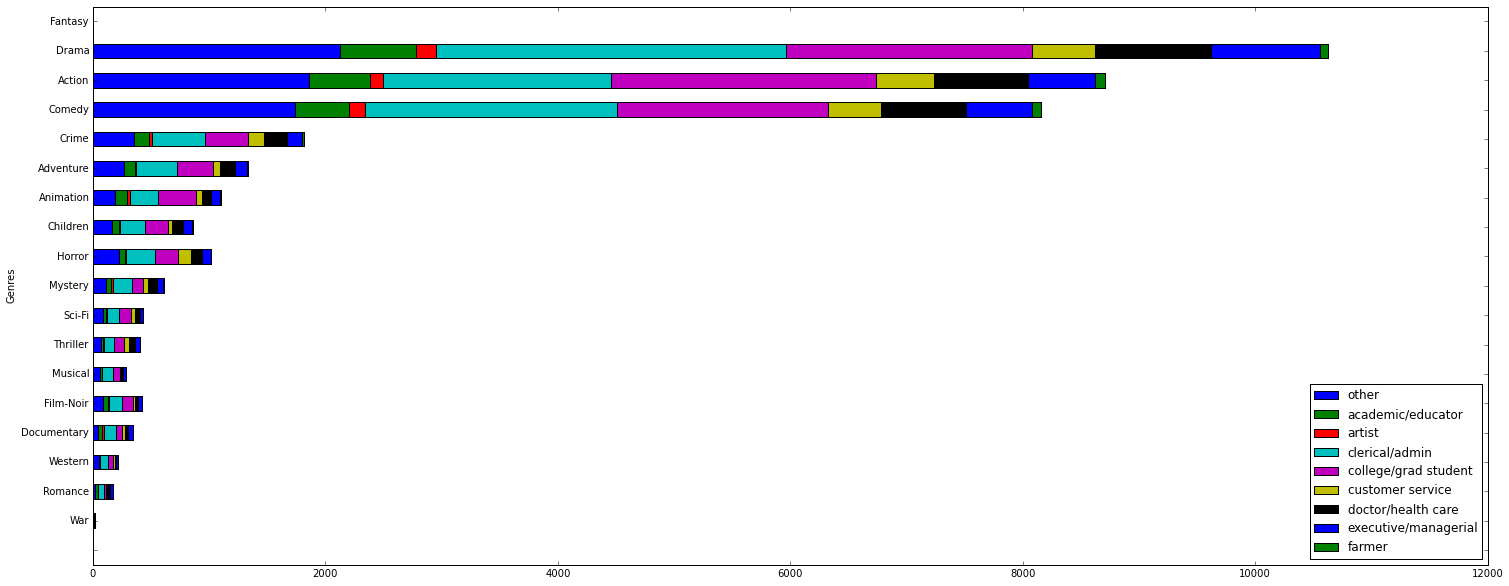

In [15]:
# let's choose 10 occupation and build plot by number of ratings for each genre
occupation1 = occupation[1:10]
df1 = sorted_by_other[occupation1]
# we are plotting with help of pandas method "plot()"
df1.plot(kind='barh', figsize=[25, 10], x=sorted_by_other.Genres, stacked=True);

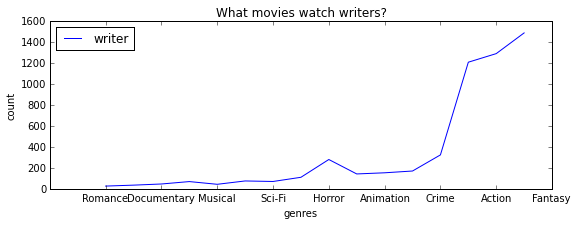

In [16]:
# Let's see what films watch writers?
df = sorted_by_other[['Genres', 'writer']]

df.plot(kind='line', x=df.Genres, figsize=[9, 3])
plt.title('What movies watch writers?')
plt.ylabel('count')
plt.xlabel('genres');

In [18]:
# display the main statistics
movielens.describe()

,index,user_id,movie_id,rating,timestamp,age
count,100000.000000,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,49999.500000,462.48475,425.530130,3.529860,8.835289e+08,32.969850
std,28867.657797,266.61442,330.798356,1.125674,5.343856e+06,11.562623
min,0.000000,1.00000,1.000000,1.000000,8.747247e+08,7.000000
25%,24999.750000,254.00000,175.000000,3.000000,8.794487e+08,24.000000
50%,49999.500000,447.00000,322.000000,4.000000,8.828269e+08,30.000000
75%,74999.250000,682.00000,631.000000,4.000000,8.882600e+08,40.000000
max,99999.000000,943.00000,1682.000000,5.000000,8.932866e+08,73.000000


In [19]:
# Which age group is ranking which genre the most?

# We are dividing people in 8 group by age.
# as we can see from previous kernel: the maximum age is 73 years
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# Add new column with age_group
movielens['age_group'] = pd.cut(movielens['age'], range(0, 81, 10), right=False, labels=labels)
movielens['age_group'].fillna('0-9', inplace=True)
print movielens['age_group'].drop_duplicates()[:20]

0       40-49
39      30-39
132     20-29
432     50-59
1895    60-69
3181      0-9
4470    10-19
9611    70-79
Name: age_group, dtype: category
Categories (8, object): [0-9 < 10-19 < 20-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79]


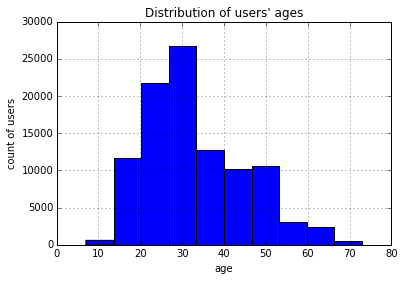

In [20]:
# let's look at how age is distributed amongst our users
# Call pandas' "hist" on the column to produce a histogram
movielens.age.hist(bins=10)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [21]:
# Now we are comparing ratings across age groups
movielens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

What we see:

- old users are more critical than other, while users in 70-79 do not watch movies a lot or do not leave the reviews.

In [22]:
# Which movies are most highly rated?

# Group data by title and fing rating's mean
movie_stats = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1    5
Marlene Dietrich: Shadow and Light (1996)       1    5
Saint of Fort Washington, The (1993)            2    5
Someone Else's America (1995)                   1    5
Star Kid (1997)                                 3    5

In [23]:
# For better analysis we only look at movies that have been rated at least 100 times
atleast_100 = movie_stats['rating']['size']>= 100
movie_stats[atleast_100].sort([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

## 2. Separate to train and test data 

In [24]:
X = ratings[['user_id', 'movie_id']]
y = ratings['rating']

# random_state=42 should be only this, because the factorization matrix will build for this random content of train data !!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print "train:", X_train.shape, y_train.shape
print "test:", X_test.shape, y_test.shape

train: (70000, 2) (70000L,)
test: (30000, 2) (30000L,)


## 3. Ratings matrix (user - item pairs) forming 

In [7]:
u = np.max(ratings.user_id)
m = np.max(ratings.movie_id)
# Fill train and test rating matrices with zeros
train_data = np.zeros([u, m])
test_data  = np.zeros([u, m])
# Replace the empty values with current ratings
for i in xrange(len(ratings)):
    # Let's see how many row is already processed
    if i % 10**4 == 0 and i != 0:
        print i
    # Form train_data rating matrix
    try:
        # The indexing of user_id and movie_id starts from 1 in the dataset 
        train_data[X_train.loc[i, 'user_id']-1, X_train.loc[i, 'movie_id']-1] = y_train.loc[i]
    except:
        pass
    
    # Form test_data rating matrix
    try:
        # The indexing of user_id and movie_id starts from 1 in the dataset 
        test_data[X_test.loc[i, 'user_id']-1, X_test.loc[i, 'movie_id']-1] = y_test.loc[i]
    except:
        pass

print
print "train_data", train_data.shape, "\n", train_data[:10]
print 
print "test_data", test_data.shape, "\n", test_data[:10]

10000
20000
30000
40000
50000
60000
70000
80000
90000

train_data (943, 1682) 
[[ 0.  3.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]]

test_data (943, 1682) 
[[ 5.  0.  4. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## 4. Factorization matrix algorithm

In [ ]:
# Algorithm for factorization of a matrix (including regularization to avoid overfitting)
# Algorithm is available here http://cyber.sci-hub.io/MTAuMTEwOS9yaXZmLjIwMTIuNjE2OTgzMQ==/nguyen2012.pdf
from numba import jit   # We use this module to compile Python code to the byte code 
from time import time

@jit
def RNMF(R, K, steps=10000, alpha=0.001, beta=0.002):
    """
    :params:
        R     : a matrix that should be factorized, dimension n x m
        K     : the number of latent features
        steps : the maximum number of steps to perform the optimisation
        alpha : the learning rate
        beta  : the regularization parameter
    Returns:
        the final matrices P and Q
    """
    start = time()   # Let's measure the elapsed time
    n, m = R.shape   # Define dimentions of the matrix R
    # Create some random matrices nxk and mxk
    P = np.random.rand(n, K)
    Q = np.random.rand(m, K)
    Q = Q.T   # Transpose matrix Q 
    s = len(np.where(R > 0)[0])
    for step in xrange(steps):
        if step % 10 == 0 and step != 0:
            dur = time() - start
            print "Iteration #{}. Elapsed time: {} min {} sec.".format(step, int(dur//60), int(round(dur%60)))
        for i in xrange(n):       # for each user ...
            for j in xrange(m):   # for each movie ...
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] += alpha * (eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (eij * P[i][k] - beta * Q[k][j])
        e = 0
        for i in xrange(n):
            for j in xrange(m):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
        if np.sqrt(e/s) < 0.01:
            break
    return P, Q

def getFM(P, Q, left_bound, right_bound, err=0.499):
    """
    :params:
        P, Q         : latent features matrices
        left_bound   : the minimal possible value of the rating
        right_bound  : the maximal possible value of the rating
        err          : available declination from `left_bound` and `right_bound`
    Returns:
        the factorized matrix FM
    """
    FM = np.dot(fP, fQ)
    n, m = FM.shape 
    for i in xrange(n):
        for j in xrange(m):
            if left_bound-err > FM[i][j]:
                FM[i][j] = left_bound - err
            elif right_bound+err-err < FM[i][j]:
                FM[i][j] = right_bound + err
    return FM

In [8]:
fP, fQ = RNMF(train_data, 10, alpha=0.001, beta=0.001)
FM = getFM(fP, fQ, 1, 5)

# Save FM to txt file
np.savetxt('FM_100K_MovieLens.txt', FM)

Iteration #10. Elapsed time: 1 min 2 sec.

Iteration #20. Elapsed time: 1 min 53 sec.

Iteration #30. Elapsed time: 2 min 54 sec.

Iteration #40. Elapsed time: 3 min 45 sec.

Iteration #50. Elapsed time: 4 min 37 sec.

Iteration #60. Elapsed time: 5 min 30 sec.

Iteration #70. Elapsed time: 6 min 21 sec.

Iteration #80. Elapsed time: 7 min 13 sec.

Iteration #90. Elapsed time: 8 min 4 sec.

Iteration #100. Elapsed time: 9 min 12 sec.

Iteration #110. Elapsed time: 10 min 14 sec.

Iteration #120. Elapsed time: 11 min 5 sec.

Iteration #130. Elapsed time: 11 min 56 sec.

Iteration #140. Elapsed time: 12 min 46 sec.

Iteration #150. Elapsed time: 13 min 37 sec.

Iteration #160. Elapsed time: 14 min 28 sec.

Iteration #170. Elapsed time: 15 min 19 sec.

Iteration #180. Elapsed time: 16 min 9 sec.

Iteration #190. Elapsed time: 17 min 1 sec.

Iteration #200. Elapsed time: 17 min 52 sec.

Iteration #210. Elapsed time: 18 min 52 sec.

Iteration #220. Elapsed time: 19 min 55 sec.

Iteration #2

C:\Anaconda\lib\site-packages\numba\dataflow.py:284: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


In [25]:
# Count MSE (mean square error) and MAE (mean absolute error)
def mse(train, pred):
    # Find indeces of nonzero elements of R matrix
    ind = tuple(zip(*np.argwhere(train > 0)))
    return np.sqrt(np.sum((train[ind[0], ind[1]] - pred[ind]) ** 2) / len(ind[0]))

def mae(train, pred):
    # Find indeces of nonzero elements of R matrix
    ind = tuple(zip(*np.argwhere(train > 0)))
    return np.sum(np.abs(train[ind] - pred[ind])) / len(ind[0])

In [26]:
FM = np.genfromtxt('FM_100K_MovieLens.txt', delimiter=" ")

Let's look at the factorization matrix

In [ ]:
# Set numpy print parameters
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

#print "Train matrix:\n", train_data[:10, :10]
#print "\nFactorized matrix:\n", FM[:10, :10]
#print "\nTest matrix:\n", test_data[:10, :10]

# Calculate the MSE and MAE based on the train data
print "\nMSE:", mse(train_data, FM)
print "MAE:", mae(train_data, FM)

**What we see:**

* The MSE value is too high, it is necessary to set a larger amount of iteration in the algorithm and set another number of latent features (from 20 to 50), i.e. the accuracy can be improved, undoubtedly.

## 5. Comparison of predicted values with test data

In [11]:
# Calculate the MSE and MAE based on the test data comparing it with predicted values

n, m = FM.shape
mse = 0
mae = 0
counter = 0
for i in xrange(n):
    for j in range(m):
        if test_data[i][j] != 0:
            mse += pow(FM[i][j] - test_data[i][j], 2)
            mae += abs(FM[i][j] - test_data[i][j])
            counter += 1

mse = np.sqrt(1.0*mse/counter)
mae = 1.0*mae/counter

print "MAE:", round(mae, 3)
print "MSE:", round(mse, 3)

MAE: 0.897
MSE: 1.19


**What we see:**

* The error is about 20%. The reasons were explained above.

In [13]:
# Join `train_data` and `test_data` matrices
data_matrix = train_data.copy()
n, m = data_matrix.shape
for i in xrange(n):
    for j in xrange(m):
        if data_matrix[i][j] == 0 and test_data[i][j] != 0:
            data_matrix[i][j] = test_data[i][j]

print "data_matrix:\n", data_matrix[:10, :10]

data_matrix:
[[ 5.  3.  4.  3.  3.  5.  4.  1.  5.  3.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  2.  4.  4.  0.]
 [ 0.  0.  0.  5.  0.  0.  5.  5.  5.  4.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  4.  0.  0.  0.]
 [ 4.  0.  0.  4.  0.  0.  4.  0.  4.  0.]]


In [14]:
np.savetxt('Data_matrix.txt', data_matrix)

# START

## 6. Recommendations

In [28]:
FM = np.genfromtxt('FM_100K_MovieLens.txt', delimiter=" ")
data_matrix = np.genfromtxt('Data_matrix.txt', delimiter=" ")

# 6.1. Recommendations for unwatched movies

In [29]:
# This function returns the list of `topn` movies IDs
def get_recommendations(user_id, data_matrix, fact_matrix, topn=10):
    # Check whether the `user_id` is present in `data` matrix
    n = len(fact_matrix[0])
    if not isinstance(user_id, int) or user_id > n or user_id < 1:
        print "The user with ID = {} was not included to the factorization matrix".format(user_id)
        return
    
    # Reset movies which user with "user_id" has already seen
    user_id -= 1   # because the numeration starts from 1 in the MovieLens dataset
    fact_matrix2 = fact_matrix.copy()
    for i in xrange(n):
        if data_matrix[user_id, i] != 0.0:
            fact_matrix2[user_id, i] = 0.0
            
    topn_movies = np.argsort(fact_matrix2[user_id, :])[-topn:][::-1]
    # We add 1 to `x` because the numeration starts from 1 in the MovieLens dataset

    return map(lambda x: (x+1, round(fact_matrix2[user_id, x], 3)), topn_movies)

# This function returns the list of `topn` movies titles
def get_movies_by_id(m):
    m0 = map(lambda x: x[0], m)
    titles = movies[movies["movie_id"].isin(m0)]["title"].values
    
    rec_movies = sorted([{"movie": titles[i], "score": m[i][1]} for i in xrange(len(m))], key=lambda x: x['score'], reverse=True)
    
    for k in rec_movies:
        if k['score'] > 5.0:
            k['score'] = 5.0
        elif k['score']  < 0.0:
            k['score'] = 0.0
    
    return rec_movies

In [51]:
# Display recommended movies for user with ID user_id
# Look at how many movies watched the selected user 
user_id = 250

try:
    print "How many movies wathced the user with ID = {}:".format(user_id), len(np.where(data_matrix[user_id-1] > 0)[0])
    # IDs of recommended movies
    rec_movies_ids = get_recommendations(user_id, data_matrix, FM, 25)

    rec_movies = get_movies_by_id(rec_movies_ids)
    print "\nRecommended movies:" 
    for m in rec_movies:
        print m
        
except:
    print "The user with ID = {} was not included to the factorization matrix".format(user_id)

How many movies wathced the user with ID = 250: 122

Recommended movies:
{'movie': 'Priest (1994)', 'score': 5.0}
{'movie': 'Three Colors: Red (1994)', 'score': 5.0}
{'movie': 'Vanya on 42nd Street (1994)', 'score': 5.0}
{'movie': 'Sabrina (1954)', 'score': 5.0}
{'movie': 'Sunset Blvd. (1950)', 'score': 5.0}
{'movie': 'Stalingrad (1993)', 'score': 5.0}
{'movie': 'Blue Angel, The (Blaue Engel, Der) (1930)', 'score': 5.0}
{'movie': 'Picnic (1955)', 'score': 5.0}
{'movie': 'Great Race, The (1965)', 'score': 5.0}
{'movie': 'Crying Game, The (1992)', 'score': 5.0}
{'movie': 'Christmas Carol, A (1938)', 'score': 5.0}
{'movie': 'In the Bleak Midwinter (1995)', 'score': 5.0}
{'movie': 'With Honors (1994)', 'score': 5.0}
{'movie': 'Switchblade Sisters (1975)', 'score': 5.0}
{'movie': 'Letter From Death Row, A (1998)', 'score': 5.0}
{'movie': 'Once Were Warriors (1994)', 'score': 5.0}
{'movie': 'Purple Noon (1960)', 'score': 5.0}
{'movie': 'Top Hat (1935)', 'score': 5.0}
{'movie': 'Virtuosity (1

# 6.1. Recommendations for watched movies and error calculation

In [52]:
# This function returns the list of `topn` movies IDs
def get_recommendations_for_wathced_movies(user_id, data_matrix, fact_matrix):
    # Check whether the `user_id` is present in `data` matrix
    n = len(fact_matrix[0])
    if not isinstance(user_id, int) or user_id > n or user_id < 1:
        print "The user with ID = {} was not included to the factorization matrix".format(user_id)
        return
    
    # Reset movies which user with "user_id" has already seen
    user_id -= 1   # because the numeration starts from 1 in the MovieLens dataset
    fact_matrix2 = fact_matrix.copy()
    for i in xrange(n):
        if data_matrix[user_id, i] == 0.0:
            fact_matrix2[user_id, i] = 0.0

    topn_movies = np.argsort(fact_matrix2[user_id, :])
    # We add 1 to `x` because the numeration starts from 1 in the MovieLens dataset
    data = map(lambda x: (x+1, round(fact_matrix2[user_id, x], 3)), topn_movies)
    return filter(lambda x: x[1] > 0, data)

# This function returns the list of `topn` movies titles
def get_movies_by_id_for_wathced_movies(m):
    m0 = map(lambda x: x[0], m)
    titles = movies[movies["movie_id"].isin(m0)]["title"].values
    rec_movies = sorted([{"movie": titles[i], "score": m[i][1]} for i in xrange(len(m))], key=lambda x: x['score'], reverse=True)
    for k in rec_movies:
        if k['score'] > 5.0:
            k['score'] = 5.0
        elif k['score']  < 0.0:
            k['score'] = 0.0
    return rec_movies

# Count MSE (mean square error) and MAE (mean absolute error)
def mse_for_wathced_movies(user_id, watched_movies):
    train = []
    preds = []
    for i in watched_movies:
        preds.append(i['score'])
        train.append(movielens[(movielens['user_id'] == user_id) & (movielens['title'] == i['movie'])]['rating'].iloc[0])
    return np.sqrt(np.sum((np.array(train) - np.array(preds)) ** 2) / len(preds))

def mae_for_wathced_movies(user_id, watched_movies):
    train = []
    preds = []
    res = []
    for i in watched_movies:
        preds.append(i['score'])
        train.append(movielens[(movielens['user_id'] == user_id) & (movielens['title'] == i['movie'])]['rating'].iloc[0])
        res.append([i['movie'], i['score'], movielens[(movielens['user_id'] == user_id) & (movielens['title'] == i['movie'])]['rating'].iloc[0]])
    return np.sum(np.abs(np.array(train) - np.array(preds))) / len(preds)


In [53]:
# Display recommended movies for user with ID user_id
# Look at how many movies watched the selected user 
user_id = 250

try:
    print "How many movies wathced the user with ID = {}:".format(user_id), len(np.where(data_matrix[user_id-1] > 0)[0])
    # IDs of recommended movies
    watched_movies_ids = get_recommendations_for_wathced_movies(user_id, data_matrix, FM)
    
    watched_movies = get_movies_by_id_for_wathced_movies(watched_movies_ids)
    print len(watched_movies)
    
    print "\nRecommended movies:" 
    for m in watched_movies:
        print m
        
except:
    print "The user with ID = {} was not included to the factorization matrix".format(user_id)

How many movies wathced the user with ID = 250: 122
122

Recommended movies:
{'movie': 'Cemetery Man (Dellamorte Dellamore) (1994)', 'score': 5.0}
{'movie': 'Grace of My Heart (1996)', 'score': 5.0}
{'movie': 'Palookaville (1996)', 'score': 4.963}
{'movie': 'Beautiful Thing (1996)', 'score': 4.96}
{'movie': 'Shallow Grave (1994)', 'score': 4.952}
{'movie': "Romy and Michele's High School Reunion (1997)", 'score': 4.936}
{'movie': 'Hercules (1997)', 'score': 4.875}
{'movie': 'Keys to Tulsa (1997)', 'score': 4.845}
{'movie': 'Beautician and the Beast, The (1997)', 'score': 4.825}
{'movie': 'Shadow Conspiracy (1997)', 'score': 4.771}
{'movie': 'Winnie the Pooh and the Blustery Day (1968)', 'score': 4.748}
{'movie': 'Booty Call (1997)', 'score': 4.666}
{'movie': 'Killing Zoe (1994)', 'score': 4.65}
{'movie': 'Funeral, The (1996)', 'score': 4.61}
{'movie': 'Freeway (1996)', 'score': 4.601}
{'movie': 'Celluloid Closet, The (1995)', 'score': 4.571}
{'movie': 'Red Corner (1997)', 'score': 4.56

In [54]:
# Errors for each user calculating


print "MSE:", round(mse_for_wathced_movies(user_id, watched_movies), 3)
print "MAE:", round(mae_for_wathced_movies(user_id, watched_movies), 3)

MSE: 1.398
MAE: 1.074


## 7. Recommendations analysis for current user 

In [55]:
# Look at the recommended movies
#user_id = user_id

rec = movies[movies['movie_id'].isin(map(lambda x: x[0], rec_movies_ids))]
rec

,movie_id,title,released,genres
56,57,Priest (1994),01-Jan-1994,Drama
58,59,Three Colors: Red (1994),01-Jan-1994,Drama
463,464,Vanya on 42nd Street (1994),01-Jan-1994,Drama
485,486,Sabrina (1954),01-Jan-1954,Comedy|Romance
487,488,Sunset Blvd. (1950),01-Jan-1950,Film-Noir
592,593,Stalingrad (1993),01-Jan-1993,War
616,617,"Blue Angel, The (Blaue Engel, Der) (1930)",01-Jan-1930,Drama
617,618,Picnic (1955),01-Jan-1955,Drama
629,630,"Great Race, The (1965)",01-Jan-1965,Comedy|Musical
630,631,"Crying Game, The (1992)",01-Jan-1992,Action|Drama|Romance|War


In [56]:
# Let's look wich genres we are recommending to the selected user
x = rec.groupby('genres')['movie_id'].count()
#x.sort_values(ascending=False, inplace=True)
x

genres
Action|Drama                1
Action|Drama|Romance|War    1
Comedy                      2
Comedy|Drama                1
Comedy|Musical              1
Comedy|Musical|Romance      1
Comedy|Romance              1
Crime                       1
Crime|Drama                 2
Crime|Drama|Romance         1
Crime|Thriller              1
Drama                       9
Film-Noir                   1
Sci-Fi|Thriller             1
War                         1
Name: movie_id, dtype: int64

**What we see:**

* Many films are related to Drama, Comedy, Thriller and Documentary genres and mixins of these genres

In [57]:
# Look at the movies of the selected user
movielens = pd.merge(pd.merge(ratings, movies), users)
movies1 = movielens[movielens['user_id'] == user_id]
movies1

,user_id,movie_id,rating,timestamp,title,released,genres,age,gender,occupation,zip_code
59381,250,474,5,878089964,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,Sci-Fi|War,29,M,executive,95110
59382,250,1014,4,883263439,Romy and Michele's High School Reunion (1997),25-Apr-1997,Comedy,29,M,executive,95110
59383,250,222,4,878089547,Star Trek: First Contact (1996),22-Nov-1996,Action|Adventure|Sci-Fi,29,M,executive,95110
59384,250,144,4,878092059,Die Hard (1988),01-Jan-1988,Action|Thriller,29,M,executive,95110
59385,250,1,4,883263374,Toy Story (1995),01-Jan-1995,Animation|Children|Comedy,29,M,executive,95110
59386,250,95,5,878090499,Aladdin (1992),01-Jan-1992,Animation|Children|Comedy|Musical,29,M,executive,95110
59387,250,234,3,878091736,Jaws (1975),01-Jan-1975,Action|Horror,29,M,executive,95110
59388,250,98,5,878090365,"Silence of the Lambs, The (1991)",01-Jan-1991,Drama|Thriller,29,M,executive,95110
59389,250,1137,5,878090066,Beautiful Thing (1996),09-Oct-1996,Drama|Romance,29,M,executive,95110
59390,250,100,5,878089786,Fargo (1996),14-Feb-1997,Crime|Drama|Thriller,29,M,executive,95110


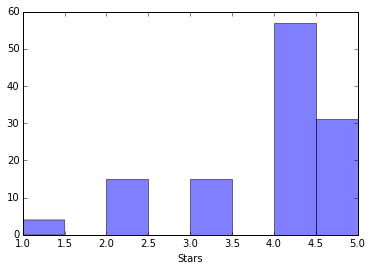

In [58]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Display the most common ratings of wathced movies
plt.hist(movies1.rating.values, bins=8, color='blue', alpha=0.5)
plt.xlabel("Stars")
plt.show()

**What we see:**

* the selected user usually give high marks (from 4 to 5) for watched movies.

* the selected user watch preferably Drama, Comedy, Action, Thriller genres and mixins of these genres and looks Drama and Documentary (and its mixins) as we have obtained from factorization matrix

* the average rating of most watched genre categories is high.

* even with the obtained accuracy we can give very realistic recommendations